In [1]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import roc_curve,auc

In [2]:
data = pd.read_csv('emails.csv')
data=data.drop('Email No.', axis=1)
data.head(10)

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0
5,4,5,1,4,2,3,45,1,0,16,...,0,0,0,0,0,0,0,0,0,1
6,5,3,1,3,2,1,37,0,0,9,...,0,0,0,0,0,0,0,0,0,0
7,0,2,2,3,1,2,21,6,0,2,...,0,0,0,0,0,0,0,1,0,1
8,2,2,3,0,0,1,18,0,0,3,...,0,0,0,0,0,0,0,0,0,0
9,4,4,35,0,1,0,49,1,16,9,...,0,0,0,0,0,0,0,0,0,0


In [3]:
X=data.iloc[:,:-1].values
Y=data.iloc[:,-1].values

## Class Logistic Regression

In [4]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

class LogisticRegression():

    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            linear_pred = np.dot(X, self.weights) + self.bias
            predictions = sigmoid(linear_pred)

            dw = (1/n_samples) * np.dot(X.T, (predictions - y))
            db = (1/n_samples) * np.sum(predictions-y)

            self.weights = self.weights - self.lr*dw
            self.bias = self.bias - self.lr*db


    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_pred)
        class_pred = [0 if y<=0.5 else 1 for y in y_pred]
        return class_pred

## Class KNN

In [5]:
def euclidean_distance(X1,X2):
    distances=np.sqrt(np.sum((X1-X2)**2))
    return  distances

class KNN():
    def __init__(self,k):
        self.k=k

    def fit(self,X,Y):
        self.X_train=X
        self.Y_train=Y

    def predict(self,X): # this function makes prediction for all the test data points
     predictions=[self.pred(x) for x in X]
     return predictions
    
    def pred(self,x): #helper function for making prediction for a single testing data
        distances=[euclidean_distance(x_train,x) for x_train in self.X_train]
        #get the closest K
        k_indices=np.argsort(distances)[:self.k] #first sorting the distances in ascending order then taking the first k values from the k_indices vector
        k_nearest_labels=[self.Y_train[i] for i in k_indices] #gives the values of target labels corresponding to those k_indices, e.g-red,red,blue,for k=3
        #majority vote
        majority_vote=Counter(k_nearest_labels).most_common() #e.g red for previous line example
        return majority_vote[0][0]

C:\Users\Subham Sabud\AppData\Local\Temp\ipykernel_13820\1278053100.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


<function matplotlib.pyplot.show(close=None, block=None)>

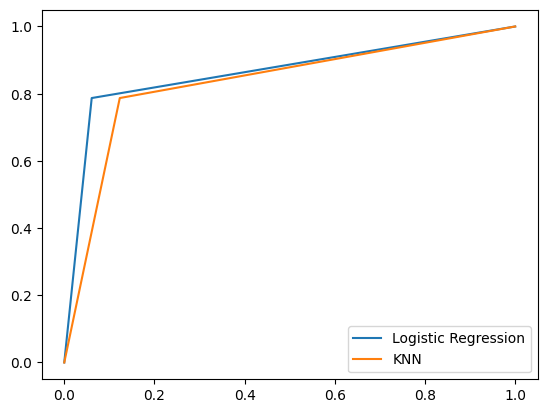

In [7]:
indices=list(range(len(Y)))
k_folds=5
f_idx=1
folds=np.array_split(indices,k_folds)

test_folds=folds[f_idx]
train_folds=np.concatenate(np.delete(folds,f_idx,axis=0))
X_train,X_test,Y_train,Y_test=X[train_folds],X[test_folds],Y[train_folds],Y[test_folds]
##fitting the model

clf1 = LogisticRegression(lr=0.01)
clf1.fit(X_train,Y_train) # calling the fit function from LogisticRegression class
y_pred_LR = clf1.predict(X_test) # calling the predict function from LogisticRegression class
fpr_LR,tpr_LR,thresold_LR=roc_curve(Y_test,y_pred_LR)

clf2 = KNN(k=5)
clf2.fit(X_train,Y_train) # calling the fit function from LogisticRegression class
y_pred_KNN = clf2.predict(X_test) # calling the predict function from LogisticRegression class
fpr_KNN,tpr_KNN,thresold_KNN=roc_curve(Y_test,y_pred_KNN)
auc_KNN=auc(fpr_KNN,tpr_KNN) 
auc_LR=auc(fpr_LR,tpr_LR)

#plt.figure()
#plt.plot(fpr_KNN,tpr_KNN)
#plt.show

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


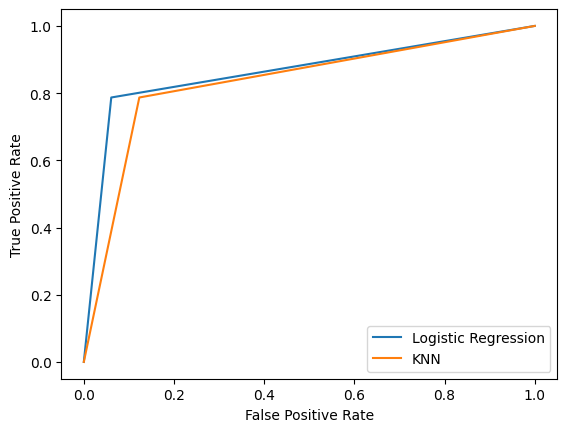

In [11]:
plt.figure()
plt.plot(fpr_LR,tpr_LR)
plt.plot(fpr_KNN,tpr_KNN)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(["Logistic Regression", "KNN"], loc ="lower right") 
plt.show
plt.savefig("ROC_curve_LR_vs_KNN.eps")

In [8]:
auc_KNN

0.8319527040859636

In [9]:
auc_LR

0.863073036036171